In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
'''
Returns the sum of 2 vectors of not necesseraly the same length by appending 0's to the shorter vector.
'''
def sum_two_vec_pad(a, b):
    if len(a) < len(b):
        c = b.copy()
        c[:len(a)] += a
    else:
        c = a.copy()
        c[:len(b)] += b
    return c

'''
returns the energy for an estimated weight vector omega, with data (X, Y)
'''
def energy(w, X, Y):
    Y_est = np.sign(np.dot(X, w))
    return 0.5 * np.sum((Y - Y_est)**2)

def accept_prob(wp, w, beta, X, Y):
    return min(1, np.exp(-beta*(energy(wp, X, Y) - energy(w, X, Y))))

def overlap(wp, w):
    return 1.0 / (w.shape[0]) * np.dot(w, wp)

In [4]:
###

### Part 1

###


################ 2.

def metropolis2(w_init, beta, X, Y, T=10):

    N = w_init.shape[0]
    M = X.shape[0]
    w = np.copy(w_init)
    wp = np.copy(w)

    for _ in range(0, T):

        index_rand = np.random.randint(0, N)
        wp = np.copy(w)
        wp[index_rand] = -1 * wp[index_rand]

        if np.random.uniform() < accept_prob(wp, w, beta, X, Y):
            w = np.copy(wp)

    energy_record = energy(w, X, Y)

    return (1.0/M) * energy_record

def metropolis_mult2(nb_runs, N, alpha_list, beta, T):

    normalized_energies_per_alpha = np.array([])

    for alpha in alpha_list:

        M = int(round(alpha * N))

        energy_record_acc = np.zeros(nb_runs)
        
        for i in range(nb_runs):

            w = 2 * np.random.random_integers(0, 1, N) - 1
            X = np.random.randn(M, N)
            Y = np.sign(np.dot(X, w))

            w_init = 2 * np.random.random_integers(0, 1, N) - 1

            energy_record_acc[i] = metropolis2(w_init, beta, X, Y, T)

        normalized_energies_per_alpha = np.append(normalized_energies_per_alpha, np.mean(energy_record_acc))

    return normalized_energies_per_alpha

In [5]:
################

# Tests for part 2.

# alpha and beta in [0.5, 5], for 'interesting' results as per paper.
N = 40
#betas = np.linspace(0.1,1.5,15)
betas = [0.1, 0.3, 0.7, 1, 1.5]

alpha_list = np.linspace(0.5,5,10)
T = 500
nb_runs = 100

results = []

for beta in betas:
    result_tmp = metropolis_mult2(nb_runs, N, alpha_list, beta, T)
    results.append(result_tmp)

C:\Users\furkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
C:\Users\furkan\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


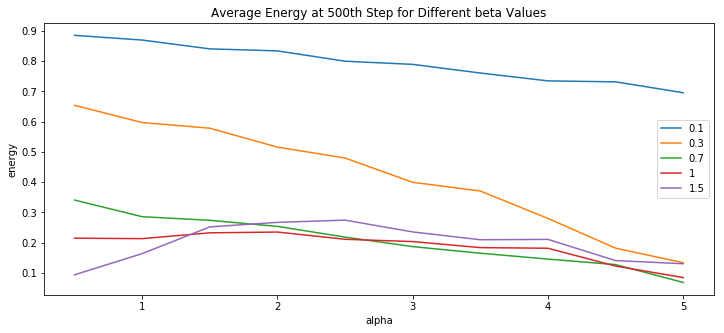

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
for i, beta in enumerate(betas):
    ax.plot(alpha_list, results[i]);
ax.legend(labels=betas);
ax.set_xlabel("alpha");
ax.set_ylabel("energy");
ax.set_title("Average Energy at {}th Step for Different beta Values".format(T));

In [10]:
fig.savefig("part2.png")
fig.savefig("part2_tight.png", bbox_inches="tight")